# Carga de datos

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/colab/ds_salaries.csv'

Mounted at /content/drive


In [2]:
# Carga los datos a un dataframe
df = pd.read_csv(file_path)

# Muestra las primeras filas
print("\n---------------------------------------------------------------------------------------------------")
print(df.head())


---------------------------------------------------------------------------------------------------
   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA    

# Limpieza de datos con Python

In [14]:
# Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.

# Total de registros
print(f"Total de registros: {len(df)}")

# Registros duplicados
print(f"Registros duplicados: {df.duplicated().sum()}")

# Se eliminan registros
df.drop_duplicates()

Total de registros: 3755
Registros duplicados: 1171


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [16]:
# Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

# Tipos de datos
print(df.dtypes)

# no encontré el diccionario de datos en la kaggle pero me aseguré de que los datos numéricos, string y date cumplan, no hay date

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [26]:
# Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’).

# Identificar columnas categóricas, se guardan en una lista
columnas_categoricas = df.select_dtypes(include=['object']).columns
print(columnas_categoricas)

# Muestra los valores únicos de cada columna
for columna in columnas_categoricas:
    print(df[columna].unique())

# Normalizar los valores categóricos (convertir a minúsculas y eliminar espacios extra)
for columna in columnas_categoricas:
    # Pude haber pasado a mayúscula pero mi gusto personal es la minúscula :/
    # strip queida los espacios antes y después
    df[columna] = df[columna].str.strip().str.lower()

# Muestra valores post normalización
for columna in columnas_categoricas:
    print(f"Valores únicos en la columna '{columna}' después de la limpieza:")
    print(df[columna].unique())

# se ve que todos los valores pasaron a minúscula, era lo esperado al aplicar lower

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')
['se' 'mi' 'en' 'ex']
['ft' 'ct' 'fl' 'pt']
['principal data scientist' 'ml engineer' 'data scientist'
 'applied scientist' 'data analyst' 'data modeler' 'research engineer'
 'analytics engineer' 'business intelligence engineer'
 'machine learning engineer' 'data strategist' 'data engineer'
 'computer vision engineer' 'data quality analyst'
 'compliance data analyst' 'data architect'
 'applied machine learning engineer' 'ai developer' 'research scientist'
 'data analytics manager' 'business data analyst' 'applied data scientist'
 'staff data analyst' 'etl engineer' 'data devops engineer' 'head of data'
 'data science manager' 'data manager' 'machine learning researcher'
 'big data engineer' 'data specialist' 'lead data analyst'
 'bi data engineer' 'director of data science'
 'machine learning scientist' 'mlops engineer' 'a

In [27]:
# Identificación de valores faltantes: Antes del manejo, no se detectaron valores faltantes en ninguna columna del dataset:

print(df.isnull().sum())

# no hay valores faltantes

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [28]:
# Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

# Estadísticas del campo salary
print(df['salary'].describe())

# se ve que valores muy bajos como min 6.000000e+03 y max 3.040000e+07

count    3.755000e+03
mean     1.906956e+05
std      6.716765e+05
min      6.000000e+03
25%      1.000000e+05
50%      1.380000e+05
75%      1.800000e+05
max      3.040000e+07
Name: salary, dtype: float64


In [32]:
# Calcular los límites inferior y superior para detectar valores anómalos
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Cualquier valor que esté fuera de los límites especificados se reemplaza por el límite más cercano.
df['salary'] = df['salary'].clip(lower=limite_inferior, upper=limite_superior)

# Valores corregidos
print(df['salary'].describe())

count      3755.000000
mean     142013.324900
std       63753.652491
min        6000.000000
25%      100000.000000
50%      138000.000000
75%      180000.000000
max      300000.000000
Name: salary, dtype: float64


# Exploración de datos con Python:

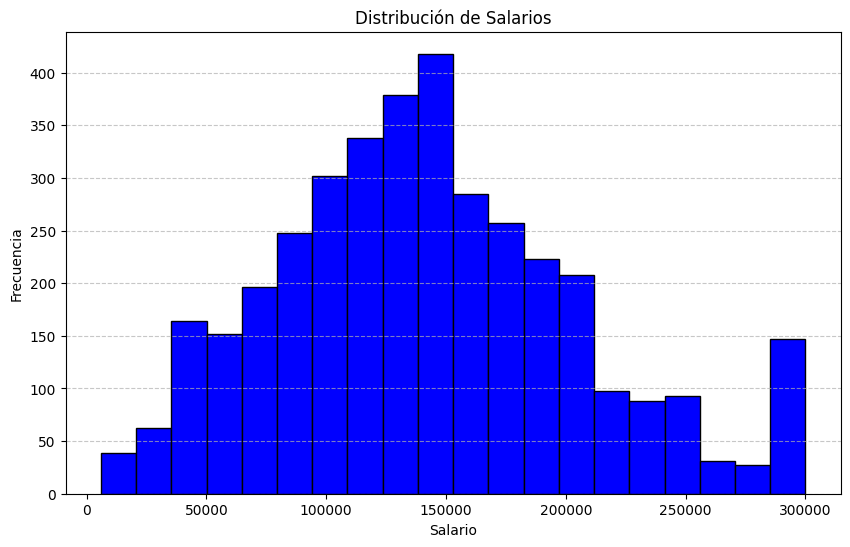

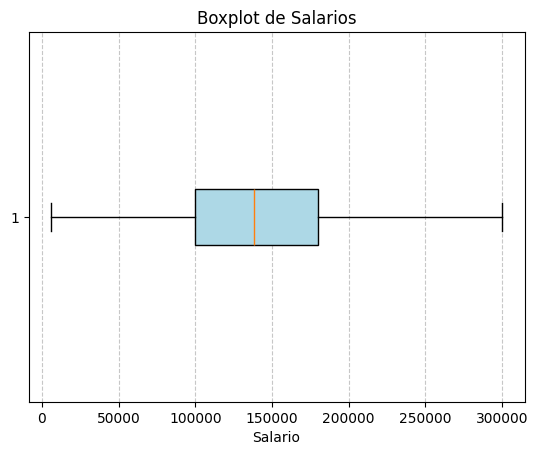

In [34]:
# Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

# Carga de biblioteca para dibujar
import matplotlib.pyplot as plt

# Tamaño de las figuras
plt.figure(figsize=(10, 6))

# Histograma para la columna 'salary'

plt.hist(df['salary'], bins=20, color='blue', edgecolor='black')
plt.title('Distribución de Salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# El histograma muestra la distribución de los salarios en el dataset.
# La mayoría de los salarios están concentrados entre 100,000 y 200,000, se ven sueldos altos que deben corresponder a directivos

plt.boxplot(df['salary'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot de Salarios')
plt.xlabel('Salario')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# El boxplot muestra la mediana, el rango intercuartil (IQR), y los valores atípicos de los salarios.
# Se observa que los valores más extremos están dentro del rango ajustado con clip.

# Se puede ver como ambos grafícos concuerdan

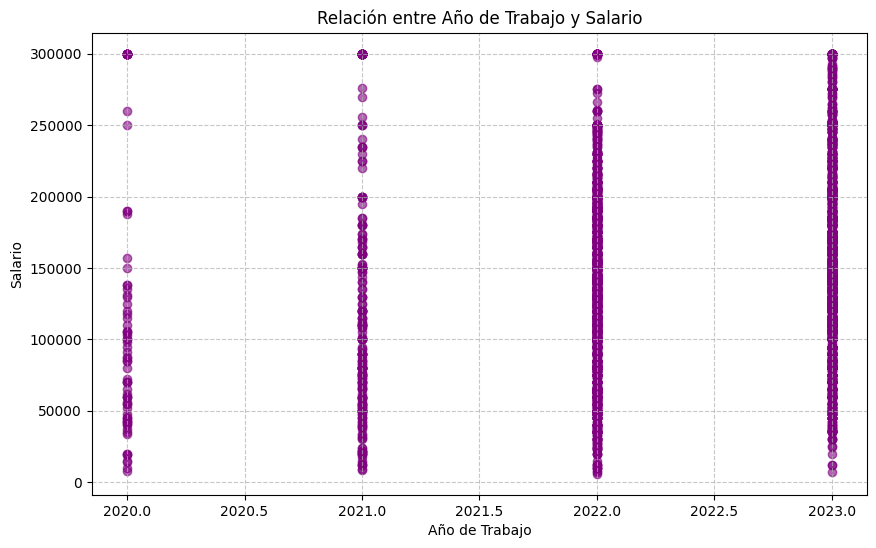

<Figure size 1000x600 with 0 Axes>

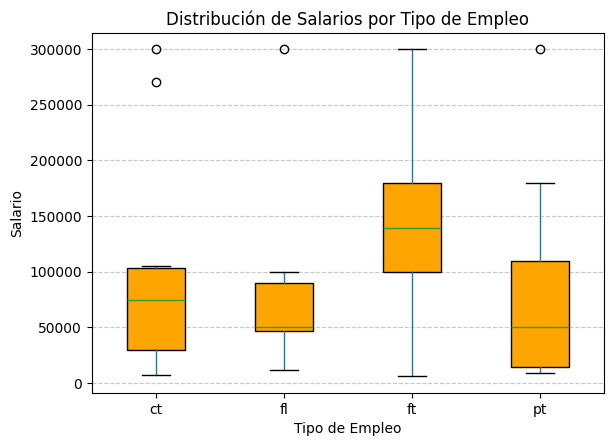

In [39]:
# Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

# Scatter plot - Salario vs. Año de Trabajo (work_year)
plt.figure(figsize=(10, 6))
plt.scatter(df['work_year'], df['salary'], alpha=0.6, c='purple')
plt.title('Relación entre Año de Trabajo y Salario')
plt.xlabel('Año de Trabajo')
plt.ylabel('Salario')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Este scatter plot muestra cómo varía el salario según el año de trabajo.
# Se observa que los salarios tienden a incrementarse en años recientes, sugiriendo una posible tendencia en la industria.

# Boxplot - Salario por Tipo de Empleo (employment_type)
# FT: Full-Time (Tiempo completo)
# PT: Part-Time (Medio tiempo)
# CT: Contract (Por contrato)
# FL: Freelance (Trabajo independiente)

plt.figure(figsize=(10, 6))
df.boxplot(column='salary', by='employment_type', grid=False, patch_artist=True,
           boxprops=dict(facecolor='orange'))
plt.title('Distribución de Salarios por Tipo de Empleo')
# Elimina el título automático generado por Pandas
plt.suptitle('')
plt.xlabel('Tipo de Empleo')
plt.ylabel('Salario')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Este boxplot compara los salarios según el tipo de empleo (FT, CT, FL, PT).
# Los trabajos de tiempo completo (FT) tienen mayores salarios en general comparados con otros tipos de empleo.


# Análisis adicional

In [41]:
# Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

print(df.describe())

# Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

#Tendencia de Salarios:
# La mediana del salario es 138,000, mientras que la media es ligeramente mayor (142,013), lo que indica una distribución ligeramente sesgada hacia salarios más altos.
# La mayoría de los salarios están concentrados entre 100,000 y 180,000.
# Se ve que para el tipo de empleo full time hay datos anómalos aún luego de aplicar la normalización lo que indica que son los salarios de altos cargos
# Se ve que el tipo de de salario por contrato también tiene valores anámolos lo que se puede deber a contratos con proveedores claves

# Relación con el Año de Trabajo:
# A partir del scatter plot (Salario vs. Año de Trabajo), se observa que los salarios tienden a ser más altos en años recientes. Esto puede estar relacionado con el aumento en la demanda de profesionales en tecnología y data science.

# Salario por Tipo de Empleo:
# El boxplot muestra que los trabajos de tiempo completo (FT) ofrecen salarios más altos, mientras que los otros salarios son más bajos

# Salario por Nivel de Experiencia:
# Los niveles más altos de experiencia (SE - Senior y EX - Executive) presentan salarios significativamente más altos que los niveles de entrada (EN - Entry-level).

# Conclusiones:
# Los datos sugieren un aumento en los salarios en los últimos años
# Existe una notable diferencia entre salarios dependiendo del tipo de empleo y nivel de experiencia. Esto destaca la importancia de la formación y la contratación en roles de tiempo completo.
# Podríamos analizar la correlación entre las ubicaciones de los empleados y los salarios para observar tendencias geográficas.

         work_year         salary  salary_in_usd  remote_ratio
count  3755.000000    3755.000000    3755.000000   3755.000000
mean   2022.373635  142013.324900  137570.389880     46.271638
std       0.691448   63753.652491   63055.625278     48.589050
min    2020.000000    6000.000000    5132.000000      0.000000
25%    2022.000000  100000.000000   95000.000000      0.000000
50%    2022.000000  138000.000000  135000.000000      0.000000
75%    2023.000000  180000.000000  175000.000000    100.000000
max    2023.000000  300000.000000  450000.000000    100.000000
